# MW Analogues in Cosmological Simulations

#### CTA200H Mini-Project
#### Alicia Savelli
#### Advisors: Ted Mackereth and Josh Speagle

## Retrieving EAGLE Galaxy Properties: Your first SQL query in Python

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from sympy import *

In [2]:
#init_printing(latex)

In [106]:
#import eagleSqlTools module
import eagleSqlTools as sql

#initialize connection to database
username = 'whd180'
password = 'bfb933mj'

con = sql.connect(username, password=password)

In [109]:
#create a query
#SELECT <variables/columns to extract>
#FROM <simulation/table>
#WHERE <snapshot/condition on variables>
query="""SELECT MassType_Star as stellar_mass, StarFormationRate as SFR
         FROM RefL0100N1504_SubHalo
         WHERE SnapNum = 28""" 
#run query and store output as variable
data = sql.execute_query(con,query)

In [117]:
query3="""SELECT sub.MassType_Star as stellar_mass, 
                 sub.StarFormationRate as SFR,
                 mag.r_nodust as r,
                 mag.g_nodust as g
          FROM RefL0100N1504_SubHalo as sub,
               RefL0100N1504_Magnitudes as mag
          WHERE sub.SnapNum = 28 and
                sub.GalaxyID = mag.GalaxyID"""
data3 = sql.execute_query(con,query3)

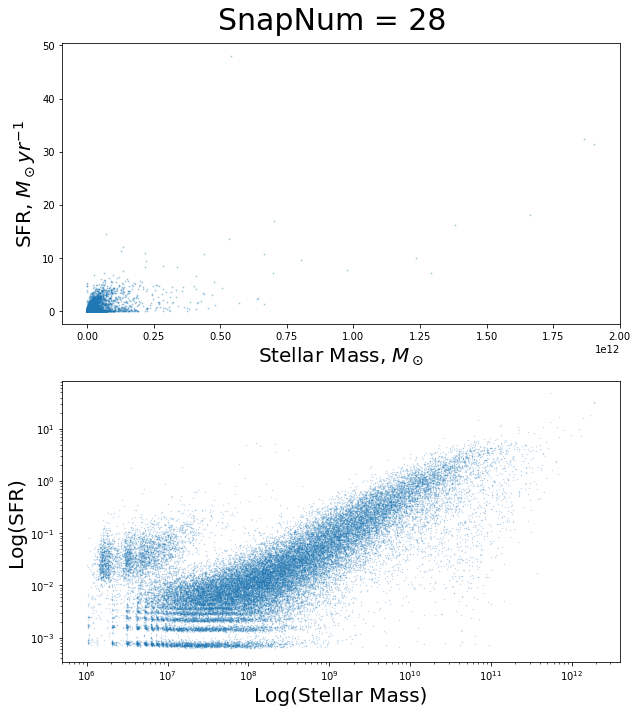

In [5]:
#plot stellar mass and SFR against each other
stellar_mass = data['stellar_mass']
SFR = data['SFR']

plt.figure(figsize=(10,10))
plt.suptitle('SnapNum = 28', fontsize=30)
plt.subplots_adjust(top=0.93, bottom=0.07, hspace=0.2)

plt.subplot(2,1,1)
plt.scatter(stellar_mass, SFR, s=0.8, alpha = 0.3)
plt.xlabel(r'Stellar Mass, $M_\odot$', fontsize=20)
plt.ylabel(r'SFR, $M_\odot yr^{-1}$', fontsize=20)

plt.subplot(2,1,2)
plt.loglog(stellar_mass, SFR, '.', markersize = 0.8, alpha = 0.3)
plt.xlabel(r'Log(Stellar Mass)', fontsize=20)
plt.ylabel(r'Log(SFR)', fontsize=20)

##plt.savefig("SMvSFR.eps")
#plt.savefig("SMvSFR.pdf")
#plt.savefig("SMvSFR.png")
plt.show()

In [ ]:
#plot 2D histogram
#stellar_mass = data['stellar_mass']
#SFR = data['SFR']

#print(stellar_mass.shape[0])
#print(SFR.shape[0])

#log_stellar_mass = np.array()
#log_SFR = np.array()
#for i in range(stellar_mass.shape[0]):
    #np.append(log_stellar_mass, np.log(stellar_mass[i]))
    #np.append(log_SFR, np.log(SFR[i]))
    
    #print(log_SFR)
    #print(log_stellar_mass[i])

#plt.figure(figsize=(10,10))
#plt.hist2d(log_stellar_mass, log_SFR, bins=(100,100), cmap=plt.cm.viridis)
#plt.hist2d(stellar_mass, SFR, bins=(100,100), cmap=plt.cm.viridis)
#plt.colorbar()
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel(r'Log(Stellar Mass)', fontsize=20)
#plt.ylabel(r'Log(SFR)', fontsize=20)

#plt.show()

In [6]:
#properties of stellar_mass, SFR
print(min(stellar_mass))
print(max(stellar_mass))
print(min(SFR))
print(max(SFR))
print(stellar_mass.shape[0])
print(SFR.shape[0])

0.0
1905425300000.0
0.0
48.093414
2275510
2275510


In [ ]:
##remove all 0 entries and take log
##MORE EFFICIENT METHOD BELOW

# log_stellar_mass = np.array([])
# log_SFR = np.array([])

# log_stellar_mass = []
# log_SFR = []
# for i in range(stellar_mass.shape[0]):
#     if stellar_mass[i] != 0 and SFR[i] != 0:
#         log_stellar_mass = np.append(log_stellar_mass, np.log10(stellar_mass[i]))
#         log_SFR = np.append(log_SFR, np.log10(SFR[i]))

    
#     #print(log_SFR)
#     #print(log_SFR[i])

In [7]:
#remove all 0 entries and take log
log_stellar_mass = []
log_SFR = []

for i in range(stellar_mass.shape[0]):
    if stellar_mass[i] != 0 and SFR[i] != 0:
        log_stellar_mass.append(np.log10(stellar_mass[i]))
        log_SFR.append(np.log10(SFR[i]))

#convert lists to arrays
log_stellar_mass = np.array(log_stellar_mass)
log_SFR = np.array(log_SFR)

In [103]:
# logsel = ((stellar_mass != 0) & (SFR != 0))
# log_stellar_mass, log_SFR = np.log10(stellar_mass[logsel]) & np.log10(SFR[logsel])

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [8]:
#properties of log arrays
print(min(log_stellar_mass))
print(max(log_stellar_mass))
print(min(log_SFR))
print(max(log_SFR))
print(log_stellar_mass.shape[0])
print(log_SFR.shape[0])

6.006214
12.279992
-3.2224457
1.6820856
41491
41491


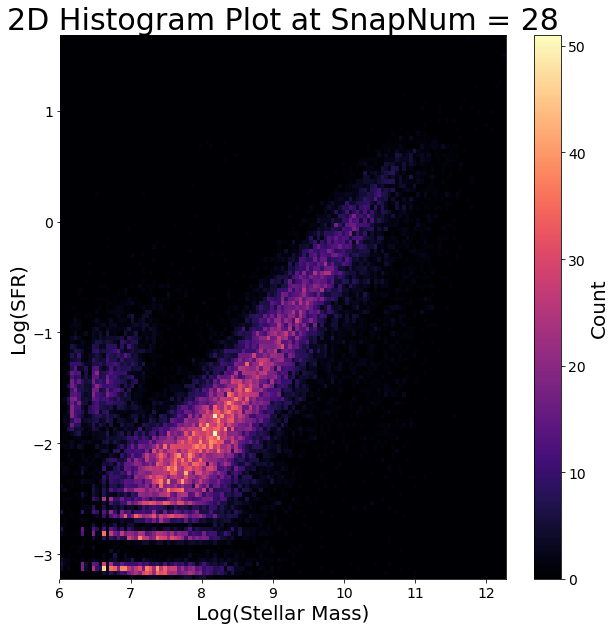

In [9]:
#plot 2D histogram
nbins = 125
#xbins = np.linspace(min(log_stellar_mass)), max(log_stellar_mass), nbins)
#ybins = np.linspace(min(log_SFR)), max(log_SFR), nbins)

plt.figure(figsize=(10,10))
plt.hist2d(log_stellar_mass, log_SFR, bins=(nbins, nbins), cmap=plt.cm.magma)
plt.xlabel('Log(Stellar Mass)', fontsize=20)
plt.ylabel('Log(SFR)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2D Histogram Plot at SnapNum = 28', fontsize=30)

cb = plt.colorbar()
cb.set_label(label='Count', fontsize=20)
cb.ax.tick_params(labelsize=14) 

#plt.savefig("hist.eps")
#plt.savefig("hist.pdf")
#plt.savefig("hist.png")
plt.show()

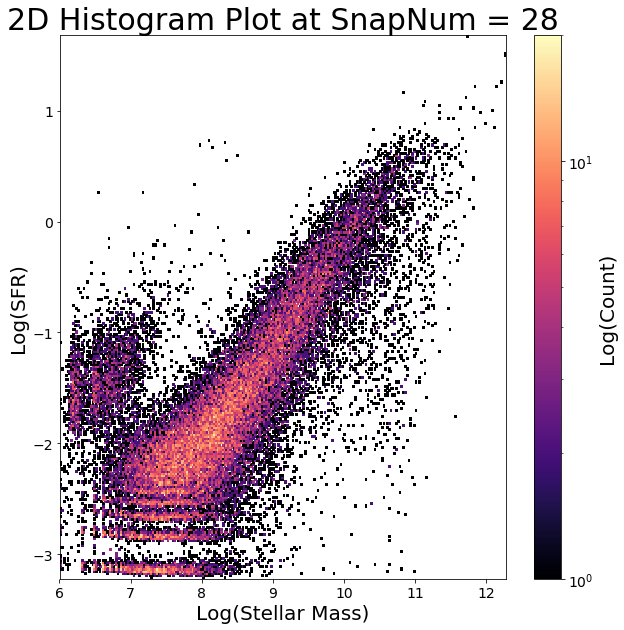

In [10]:
#plot 2D histogram with log(count)
nbins = 250
#xbins = np.linspace(min(log_stellar_mass)), max(log_stellar_mass), nbins)
#ybins = np.linspace(min(log_SFR)), max(log_SFR), nbins)

plt.figure(figsize=(10,10))
plt.hist2d(log_stellar_mass, log_SFR, bins=(nbins, nbins), norm=mpl.colors.LogNorm(), cmap=plt.cm.magma)
plt.xlabel('Log(Stellar Mass)', fontsize=20)
plt.ylabel('Log(SFR)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2D Histogram Plot at SnapNum = 28', fontsize=30)

cb = plt.colorbar()
cb.set_label(label='Log(Count)', fontsize=20)
cb.ax.tick_params(labelsize=14) 

#plt.savefig("histlog.eps")
#plt.savefig("histlog.pdf")
#plt.savefig("histlog.png")
plt.show()

## Going Deeper into the Simulations: More properties and more snapshots

In [15]:
# #create a query for 0 < z < 0.5
# #SELECT <variables/columns to extract>
# #FROM <simulation/table>
# #WHERE <snapshot/condition on variables>
# query2="""SELECT MassType_Star as stellar_mass2, StarFormationRate as SFR2 
#          FROM RefL0100N1504_SubHalo
#          WHERE Redshift < 0.5""" 
# #run query and store output as variable
# data2 = sql.execute_query(con,query2)

In [62]:
#create a query for 0 < z < 0.5
#SELECT <variables/columns to extract>
#FROM <simulation/table>
#WHERE <snapshot/condition on variables>
query2="""SELECT MassType_Star as stellar_mass2, 
                 StarFormationRate as SFR2,
                 GalaxyID as galaxyID,
                 TopLeafID as topleaf,
                 LastProgID as lastprog,
                 DescendantID as descID,
                 Redshift as Z,
                 Mass as mass
         FROM RefL0100N1504_SubHalo
         WHERE Redshift < 0.5
         ORDER BY GalaxyID""" 
#run query and store output as variable
data2 = sql.execute_query(con,query2)

In [16]:
#Number of galaxies
stellar_mass2 = data2['stellar_mass2']
SFR2 = data2['SFR2']
print('Number of galaxies = ', stellar_mass2.shape[0])
print(SFR2.shape[0])

Number of galaxies =  11819412
11819412


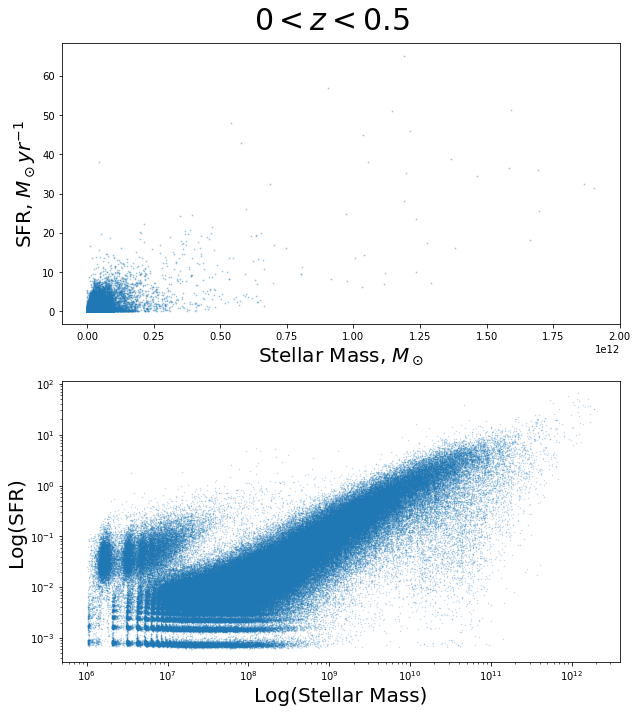

In [17]:
#plot stellar mass and SFR against each other
plt.figure(figsize=(10,10))
plt.suptitle(r'$0<z<0.5$', fontsize=30)
plt.subplots_adjust(top=0.93, bottom=0.07, hspace=0.2)

plt.subplot(2,1,1)
plt.scatter(stellar_mass2, SFR2, s=0.8, alpha = 0.3)
plt.xlabel(r'Stellar Mass, $M_\odot$', fontsize=20)
plt.ylabel(r'SFR, $M_\odot yr^{-1}$', fontsize=20)

plt.subplot(2,1,2)
plt.loglog(stellar_mass2, SFR2, '.', markersize = 0.8, alpha = 0.3)
plt.xlabel(r'Log(Stellar Mass)', fontsize=20)
plt.ylabel(r'Log(SFR)', fontsize=20)

##plt.savefig("SMvSFR2.eps")
#plt.savefig("SMvSFR2.pdf")
#plt.savefig("SMvSFT2.png")
plt.show()

In [ ]:
# #remove all 0 entries and take log
## MORE EFFICIENT METHOD BELOW
# log_stellar_mass2 = np.array([])
# log_SFR2 = np.array([])
# for i in range(stellar_mass2.shape[0]):
#     if stellar_mass2[i] != 0 and SFR2[i] != 0:
#         log_stellar_mass2 = np.append(log_stellar_mass2, np.log10(stellar_mass2[i]))
#         log_SFR2 = np.append(log_SFR2, np.log10(SFR2[i]))
    
#     #print(log_SFR)
#     #print(log_SFR[i])

In [18]:
#remove all 0 entries and take log
log_stellar_mass2 = []
log_SFR2 = []

for i in range(stellar_mass2.shape[0]):
    if stellar_mass2[i] != 0 and SFR2[i] != 0:
        log_stellar_mass2.append(np.log10(stellar_mass2[i]))
        log_SFR2.append(np.log10(SFR2[i]))

#convert lists to arrays
log_stellar_mass2 = np.array(log_stellar_mass2)
log_SFR2 = np.array(log_SFR2)

In [19]:
#properties of log arrays
print(min(log_stellar_mass2))
print(max(log_stellar_mass2))
print(min(log_SFR2))
print(max(log_SFR2))
print(log_stellar_mass2.shape[0])
print(log_SFR2.shape[0])

6.006214
12.279992
-3.2224457
1.8141674
269083
269083


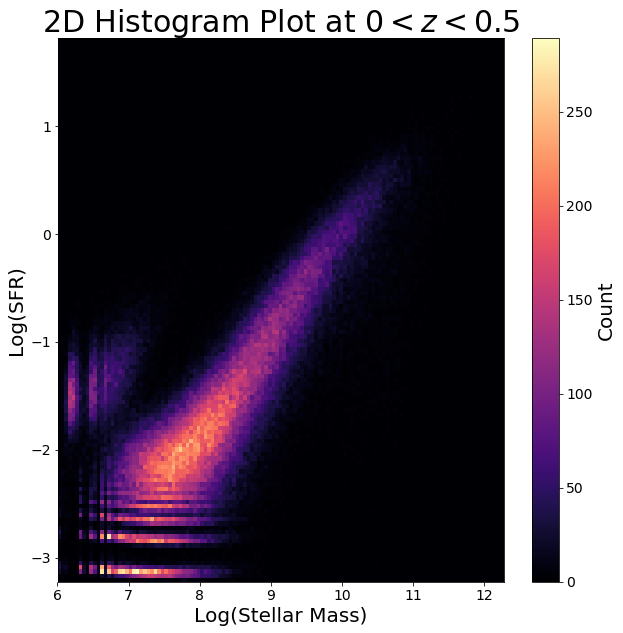

In [20]:
#plot 2D histogram
nbins = 125
#xbins = np.linspace(min(log_stellar_mass)), max(log_stellar_mass), nbins)
#ybins = np.linspace(min(log_SFR)), max(log_SFR), nbins)

plt.figure(figsize=(10,10))
plt.hist2d(log_stellar_mass2, log_SFR2, bins=(nbins, nbins), cmap=plt.cm.magma)
plt.xlabel('Log(Stellar Mass)', fontsize=20)
plt.ylabel('Log(SFR)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'2D Histogram Plot at $0<z<0.5$', fontsize=30)

cb = plt.colorbar()
cb.set_label(label='Count', fontsize=20)
cb.ax.tick_params(labelsize=14) 

#plt.savefig("hist2.eps")
#plt.savefig("hist2.pdf")
#plt.savefig("hist2.png")
plt.show()

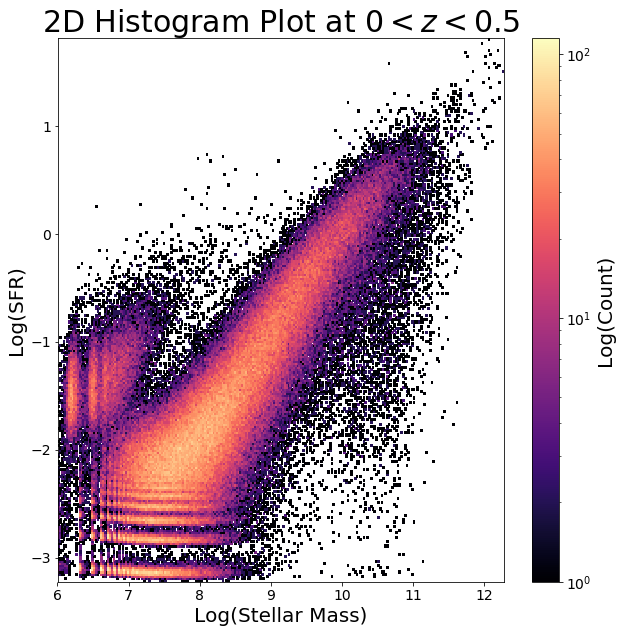

In [21]:
#plot 2D histogram with log(count)
nbins = 250
#xbins = np.linspace(min(log_stellar_mass)), max(log_stellar_mass), nbins)
#ybins = np.linspace(min(log_SFR)), max(log_SFR), nbins)

plt.figure(figsize=(10,10))
plt.hist2d(log_stellar_mass2, log_SFR2, bins=(nbins, nbins), norm=mpl.colors.LogNorm(), cmap=plt.cm.magma)
plt.xlabel('Log(Stellar Mass)', fontsize=20)
plt.ylabel('Log(SFR)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r'2D Histogram Plot at $0<z<0.5$', fontsize=30)

cb = plt.colorbar()
cb.set_label(label='Log(Count)', fontsize=20)
cb.ax.tick_params(labelsize=14) 

#plt.savefig("histlog2.eps")
#plt.savefig("histlog2.pdf")
#plt.savefig("histlog2.png")
plt.show()

In [ ]:
# #create a query for merger table
# #SELECT <variables/columns to extract>
# #FROM <simulation/table>
# #WHERE <snapshot/condition on variables>
# query3="""SELECT GalaxyID as GID, LastProgID as LPID, TopLeafID as TLID, DescendantID as DID
#          FROM RefL0100N1504_SubHalo
#          WHERE Redshift < 0.5""" 
# #run query and store output as variable
# data3 = sql.execute_query(con,query3)

In [64]:
#Number of galaxies
GalaxyID = data2['galaxyID']
LastProgID = data2['lastprog']
TopLeafID = data2['topleaf']
DescendantID = data2['descID']
Z = data2['Z']
mass = data2['mass']

#make sure they are all the same length
print(GalaxyID.shape[0])
print(LastProgID.shape[0])
print(TopLeafID.shape[0])
print(DescendantID.shape[0])
print(Z.shape[0])
print(mass.shape[0])

11819412
11819412
11819412
11819412
11819412
11819412


In [ ]:
# #Pull redshft
# query4="""SELECT Redshift as Z
#          FROM RefL0100N1504_SubHalo
#          WHERE Redshift < 0.5""" 
# #run query and store output as variable
# data4 = sql.execute_query(con,query4)

# Z = data4['Z']
# print(Z.shape[0])

In [ ]:
##TAKES TOO LONG, MORE EFFICIENT METHOD BELOW

# Z0 = np.array([])
# SM0 = np.array([])
# GID0 = np.array([])
# LPID0 = np.array([])
# TLID0 = np.array([])
# DID0 = np.array([])

# # count = 0

# for i in range(stellar_mass2.shape[0]):
#     if Z[i] < 0.01: #redshift = 0 - less than a small number since floats
# #         count += 1
        
#         Z0 = np.append(Z0, Z[i])
#         SM0 = np.append(SM0, stellar_mass2[i])
#         GID0 = np.append(GID0, GalaxyID[i])
#         LPID0 = np.append(LPID0, LastProgID[i])
#         TLID0 = np.append(TLID0, TopLeafID[i])
#         DID0 = np.append(DID0, DescendantID[i])

In [ ]:
# count
# print(Z0.shape[0])

In [ ]:
#Z[11819411]

In [ ]:
# Z0 = Z[Z < 0.01]
# Z0.shape[0]

In [27]:
#Find max of stellar mass
selection = Z < 0.01 #save True/False for Z = 0
SM0 = stellar_mass2[selection] #Array of values in stellar_mass2 where z = 0
 
#print(max(SM0))
MaxSM = np.amax(SM0) #max of SM0
print('Stellar mass of most massive galaxy =', MaxSM)

#MaxSM_ind = np.where(SM0 == MaxSM)
#MaxSM_ind = np.argmax(SM0) #index of max of SM0
MaxSM_ind = np.where(stellar_mass2 == MaxSM)[0][0] #index of max of stellar_mass2
print('Index of most massive galaxy =', MaxSM_ind)

Stellar mass of most massive galaxy = 1905425300000.0
Index of most massive galaxy = 947774


In [28]:
#compare with max of stellar mass when Z = 0
print(SM0.shape[0])
print(stellar_mass.shape[0])
print(max(SM0))
print(max(stellar_mass))
print(np.where(SM0 == max(stellar_mass)))
print(np.argmax(stellar_mass))
print(SM0[71441])

2275510
2275510
1905425300000.0
1905425300000.0
(array([71441]),)
71441
1905425300000.0


In [49]:
maxmass_GID = GalaxyID[MaxSM_ind] #GalaxyID of most massive galaxy
print('GalaxyID of most massive galaxy =', GID)

GID_ind = np.where(GalaxyID == maxmass_GID)[0][0] #index of GalaxyID of most masstive galaxy
print('Index of GalaxyID of most massive galaxy =', GID_ind)

GalaxyID of most massive galaxy = 21379521
Index of GalaxyID of most massive galaxy = 947774


In [50]:
DID = DescendantID[GID_ind] #DescendantID of most massive galaxy
print('DescendantID of most massive galaxy =', DID)

DescendantID of most massive galaxy = 21379521


In [104]:
DID_ind = np.where(DescendantID == DID)[0]
print('Indices of most massive galaxy =', DID_ind)
print('There are', DID_ind.shape[0], 'descendants', DID_ind, 'of the Galaxy', GID, 'of max mass', MaxSM, 'solar masses.')

Indices of most massive galaxy = [947774 947775 953803 ... 964011 964012 964013]
There are 3060 descendants [947774 947775 953803 ... 964011 964012 964013] of the Galaxy 21379521 of max mass 1905425300000.0 solar masses.


In [72]:
#want all the galaxyID's between the ID of the most massive galaxy and its lastprog
maxmass_topleaf = TopLeafID[GID_ind] #Main branch descendants
maxmass_lastprog = LastProgID[GID_ind] #All descendants

#no_mainbranch_desc = maxmass_topleaf - maxmass_GID
#no_all_desc = maxmass_lastprog - maxmass_GID

mainbranch_desc = np.arange(maxmass_GID, maxmass_topleaf, 1)
no_mainbranch_desc = len(mainbranch_desc)
all_desc = np.arange(maxmass_GID, maxmass_lastprog, 1)
no_all_desc = len(all_desc)
#print(mainbranch_desc)
#print(len(mainbranch_desc))

print('There are', no_mainbranch_desc, 'descendants of Galaxy', maxmass_GID, 'along the main branch. These are galaxies', mainbranch_desc)
print('There are', no_all_desc, 'total descendants of Galaxy', maxmass_GID, '. These are galaxies', all_desc)

There are 27 descendants of Galaxy 21379521 along the main branch. These are galaxies [21379521 21379522 21379523 21379524 21379525 21379526 21379527 21379528
 21379529 21379530 21379531 21379532 21379533 21379534 21379535 21379536
 21379537 21379538 21379539 21379540 21379541 21379542 21379543 21379544
 21379545 21379546 21379547]
There are 194064 total descendants of Galaxy 21379521 . These are galaxies [21379521 21379522 21379523 ... 21573582 21573583 21573584]


In [71]:
# mainbranch_desc = np.arange(maxmass_GID, maxmass_topleaf, 1)
# print(mainbranch_desc)
# print(len(mainbranch_desc))

[21379521 21379522 21379523 21379524 21379525 21379526 21379527 21379528
 21379529 21379530 21379531 21379532 21379533 21379534 21379535 21379536
 21379537 21379538 21379539 21379540 21379541 21379542 21379543 21379544
 21379545 21379546 21379547]
27


In [81]:
mainbranch_z = []

count = 0

for i in range(Z.shape[0]):
    if GalaxyID[i] in mainbranch_desc:
    #mainbranch_z.append
        count =+ 1

mainbranch_z = Z[GalaxyID == mainbranch_desc]
mainbranch_desc

KeyboardInterrupt: 

In [89]:
#find index of mainbranch_desc, plug into Z
#mainbranch
mainbranch_ind = []
for i in range(no_mainbranch_desc):
    mainbranch_ind.append(np.where(GalaxyID == mainbranch_desc[i])[0])
mainbranch_ind

[array([947774]),
 array([947775]),
 array([947776]),
 array([947777]),
 array([947778]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64)]

In [96]:
np.where(GalaxyID == mainbranch_desc[5])

(array([], dtype=int64),)

In [97]:
mainbranch_desc[5]

21379526

In [99]:
GalaxyID[947779]

21456402

In [100]:
np.where(GalaxyID == maxmass_topleaf)

(array([], dtype=int64),)

In [118]:
stellar_mass3 = data3['stellar_mass']
SFR3 = data3['SFR']
g = data3['g']
r = data3['r']
gminusr = g - r

In [122]:
#remove all 0 entries and take log
log_stellar_mass3 = []
log_SFR3 = []
gminusr2 = []

for i in range(stellar_mass3.shape[0]):
    if stellar_mass3[i] != 0 and SFR3[i] != 0:
        log_stellar_mass3.append(np.log10(stellar_mass3[i]))
        log_SFR3.append(np.log10(SFR3[i]))
        gminusr2.append(gminusr[i])

#convert lists to arrays
log_stellar_mass3 = np.array(log_stellar_mass3)
log_SFR3 = np.array(log_SFR3)
gminusr2 = np.array(gminusr2)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

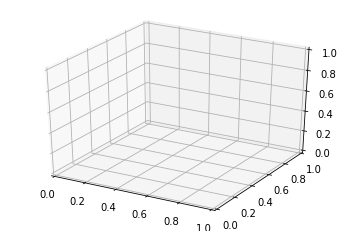

In [120]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(log_stellar_mass3, log_SFR3, gminusr, s=0.8, alpha=0.3)

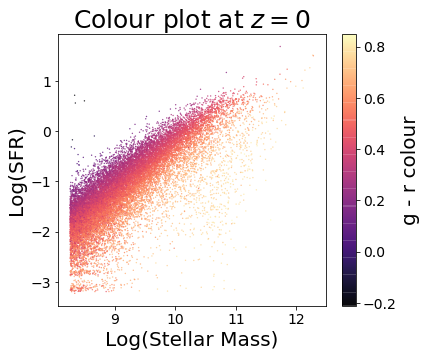

In [150]:
#colour plot
plt.figure(figsize=(6,5))

plt.scatter(log_stellar_mass3, log_SFR3, c=gminusr2, cmap=plt.cm.magma, s=2, alpha=0.8, rasterized=True, linewidth=0)

plt.xlabel('Log(Stellar Mass)', fontsize=20)
plt.ylabel('Log(SFR)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Colour plot at $z=0$', fontsize=25)

cb = plt.colorbar()
cb.set_label(label='g - r colour', fontsize=20)
cb.ax.tick_params(labelsize=14)

# plt.savefig("colour.eps")
# plt.savefig("colour.pdf")
# plt.savefig("colour.png")
plt.show()

In [ ]:
#plot 2D histogram with log(count)
nbins = 250
#xbins = np.linspace(min(log_stellar_mass)), max(log_stellar_mass), nbins)
#ybins = np.linspace(min(log_SFR)), max(log_SFR), nbins)

plt.figure(figsize=(10,10))
plt.hist2d(log_stellar_mass, log_SFR, bins=(nbins, nbins), norm=mpl.colors.LogNorm(), cmap=plt.cm.magma)
plt.xlabel('Log(Stellar Mass)', fontsize=20)
plt.ylabel('Log(SFR)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('2D Histogram Plot at SnapNum = 28', fontsize=30)

cb = plt.colorbar()
cb.set_label(label='Log(Count)', fontsize=20)
cb.ax.tick_params(labelsize=14) 

#plt.savefig("histlog.eps")
#plt.savefig("histlog.pdf")
#plt.savefig("histlog.png")
plt.show()